In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from Unet import *
from train_Unet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


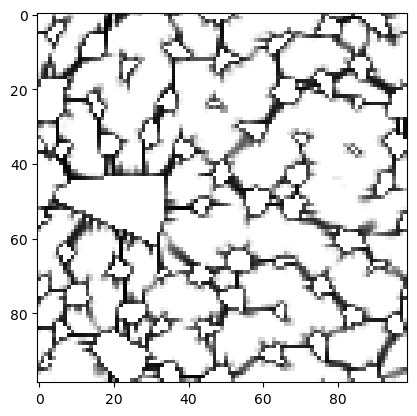

In [3]:
data = dataset(128, 'simple')
img, label = data.__getitem__(0)
loaders = get_loaders(data, 8)
plt.imshow(label[0], cmap='Greys')

In [23]:
args = {'lr' : 0.001, 'epochs' : 200, 'dev' : dev, 'name' : 'Simple_Unet_filtered'}

In [19]:
unet = UNet()

In [14]:
unet = load_network(unet, args['name'], args)

In [24]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  91512.1562500000
Epoch: 0 batch: 100 mean train loss:  88745.2031250000
Epoch: 0 batch: 200 mean train loss:  69458.1171875000
Epoch: 0 batch: 300 mean train loss:  84850.0156250000
Epoch: 0 batch: 400 mean train loss:  88343.4062500000
Epoch: 0 batch: 500 mean train loss:  72783.5625000000
Epoch: 0 batch: 600 mean train loss:  87282.7109375000
Epoch: 0 batch: 700 mean train loss:  90530.0937500000
Epoch: 0 batch: 800 mean train loss:  92553.1796875000
Epoch: 0 batch: 900 mean train loss:  80778.4375000000
Epoch: 0 batch: 1000 mean train loss:  95400.4843750000
Epoch: 0 batch: 1100 mean train loss:  86699.2500000000
Epoch: 0 batch: 1200 mean train loss:  79922.7421875000
Epoch: 0 batch: 1300 mean train loss:  84463.9062500000
Epoch: 0 batch: 1400 mean train loss:  89704.0312500000


RuntimeError: The size of tensor a (8) must match the size of tensor b (4) at non-singleton dimension 0

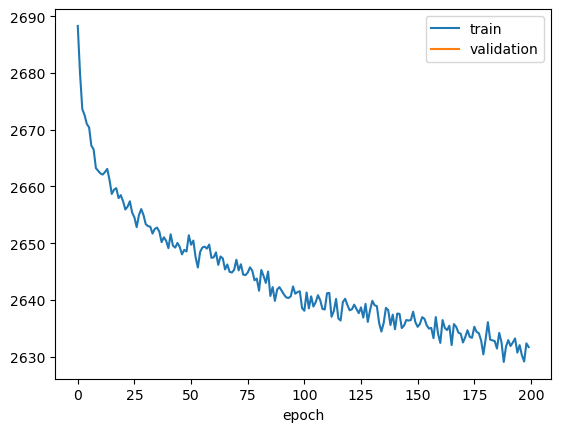

In [16]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
unet = unet.to(args['dev'])

In [9]:
y = unet(train_data)